<a href="https://colab.research.google.com/github/phslopes/senai_python_data_science-/blob/main/Estrutura_medalh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Improtar a engine para utilizar o pacote
from sqlalchemy import create_engine

Ler o CSV diretamente a partir da URL em um DataFrame chaamdo df_raw;

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv'
df_raw = pd.read_csv(url)
df_raw
sns.set_theme(style="whitegrid")

Criar o banco lakehouse.db com create_engine("sqlite:///lakehouse.db");


In [ ]:
engine = create_engine("sqlite:///lakehouse.db")

Gravar o DataFrame completo na tabela bronze_table.

In [ ]:
df_raw.to_sql('bronze_table', engine, if_exists='replace', index=False)
bronze_table = pd.read_sql("bronze_table", engine)
bronze_table.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


Usar select() e limit() para extrair 10000 linhas de bronze_table;

In [ ]:
try:
    df_sample = pd.read_sql("SELECT * FROM bronze_table LIMIT 1000", engine)
    display(df_sample.head())
except Exception as e:
    print("Ajuste o nome da tabela. Erro:", e)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


contagem de linhas / colunas, tipos de dados;

In [ ]:
print(f'contagem de linhas: {len(df_sample)}')

contagem de linhas: 1000


In [ ]:
print(f'contagem de colunas: {len(df_sample.columns)}')

contagem de colunas: 14


média e desvio-padrão de trip_distance e fare_amount;

In [ ]:
var_pop = df_sample['distance'].var(ddof=0)
std_pop = df_sample['distance'].std(ddof=0)

print(f'Média: {df_sample.distance.mean()}')
print(f'Desvio padrão: {std_pop}')
print(f'Variância: {var_pop}')


Média: 2.82057
Desvio padrão: 3.400129140944505
Variância: 11.560878175100019


In [ ]:
var_pop = df_sample['fare'].var(ddof=0)
std_pop = df_sample['fare'].std(ddof=0)

print(f'Média: {df_sample.distance.mean()}')
print(f'Desvio padrão: {std_pop}')
print(f'Variância: {var_pop}')


Média: 2.82057
Desvio padrão: 10.487560779876334
Variância: 109.98893111160032


taxa de gorjeta média (tip_amount / total_amount).


In [ ]:
df_sample['taxa_gorta'] = (df_sample['tip'] / df_sample['total'])
taxa = df_sample['taxa_gorta'].mean()
print(f'taxa de gorjeta média: {taxa}')

taxa de gorjeta média: 0.10729090604400991


Armazenar essas novas colunas / limpezas no próprio df_sample.

In [ ]:
df_sample.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,8


In [ ]:
df_sample = df_sample.dropna()

In [ ]:
df_sample.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


Gravar df_sample na tabela silver_table.

In [ ]:
df_sample.to_sql('silver_table', engine, if_exists='replace', index=False)
silver_table = pd.read_sql("silver_table", engine)
silver_table.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,taxa_gorta
979,2019-03-02 23:55:24,2019-03-03 00:04:02,1,1.60,8.0,2.36,0.00,14.16,yellow,credit card,Central Park,Upper West Side North,Manhattan,Manhattan,0.166667
980,2019-03-22 09:02:34,2019-03-22 09:32:22,1,8.30,27.0,7.20,5.76,43.26,yellow,credit card,LaGuardia Airport,Kips Bay,Queens,Manhattan,0.166436
981,2019-03-15 15:44:24,2019-03-15 15:48:39,1,0.86,5.0,1.00,0.00,9.30,yellow,credit card,Upper West Side South,Lincoln Square East,Manhattan,Manhattan,0.107527
982,2019-03-27 22:24:45,2019-03-27 22:40:25,1,5.15,16.5,4.06,0.00,24.36,yellow,credit card,Midtown Center,Central Harlem North,Manhattan,Manhattan,0.166667
983,2019-03-02 19:16:15,2019-03-02 19:23:04,1,1.02,6.5,1.00,0.00,10.80,yellow,credit card,Sutton Place/Turtle Bay North,Lenox Hill East,Manhattan,Manhattan,0.092593


Histograma de trip_distance (30 bins);

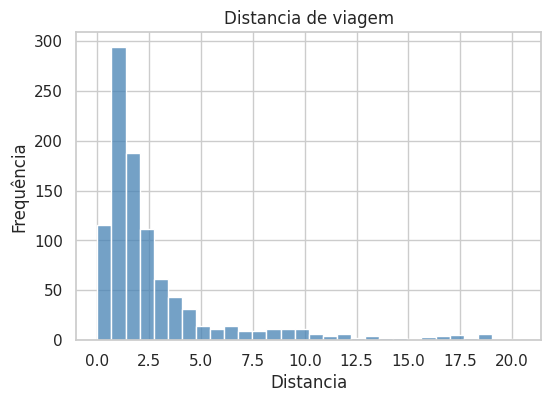

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    silver_table["distance"],
    bins=30,
    color="steelblue"
)
plt.title("Distancia de viagem")
plt.xlabel("Distancia")
plt.ylabel("Frequência")
plt.show()

Gráfico de tendência: média de total_amount por mês.

In [ ]:
silver_table['pickup'] = pd.to_datetime(silver_table['pickup'])
silver_table

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,taxa_gorta
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.00,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.166023
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.00,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.00,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.166667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.166441
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.00,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.082090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2019-03-02 23:55:24,2019-03-03 00:04:02,1,1.60,8.0,2.36,0.00,14.16,yellow,credit card,Central Park,Upper West Side North,Manhattan,Manhattan,0.166667
980,2019-03-22 09:02:34,2019-03-22 09:32:22,1,8.30,27.0,7.20,5.76,43.26,yellow,credit card,LaGuardia Airport,Kips Bay,Queens,Manhattan,0.166436
981,2019-03-15 15:44:24,2019-03-15 15:48:39,1,0.86,5.0,1.00,0.00,9.30,yellow,credit card,Upper West Side South,Lincoln Square East,Manhattan,Manhattan,0.107527
982,2019-03-27 22:24:45,2019-03-27 22:40:25,1,5.15,16.5,4.06,0.00,24.36,yellow,credit card,Midtown Center,Central Harlem North,Manhattan,Manhattan,0.166667


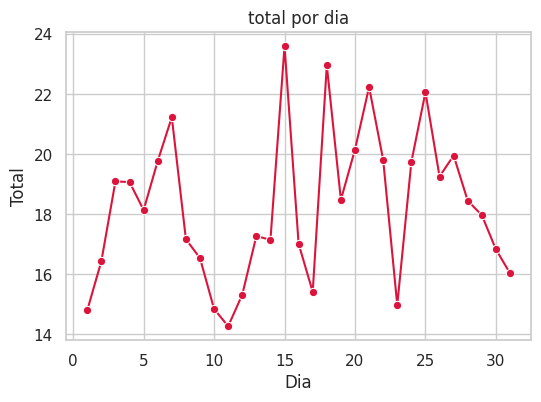

In [ ]:
silver_table['day'] = silver_table['pickup'].dt.day
media_total = silver_table.groupby("day")["total"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(
    data=media_total,
    x="day",
    y="total",
    marker="o",
    color="crimson"
)
plt.title("total por dia")
plt.xlabel("Dia")
plt.ylabel("Total")
plt.show()

Criar dois DataFrames:

df_hist – coluna trip_distance da amostra (Dados usados para o
Histograma);

df_trend – DataFrame com year_month e avg_total_amount (Dados usados
para análise de tendência);

Salvar cada um em tabelas separadas golden_hist e golden_trend.

In [ ]:
df_hist = silver_table[['distance']]
df_trend = silver_table.groupby(silver_table['pickup'].dt.to_period('D'))['total'].mean().reset_index()
df_trend['pickup'] = df_trend['pickup'].astype(str)

df_hist.to_sql('golden_hist', engine, if_exists='replace', index=False)
df_trend.to_sql('golden_trend', engine, if_exists='replace', index=False)

31

In [ ]:
print("golden_hist table:")
display(pd.read_sql("SELECT * FROM golden_hist", engine).head())

print("\ngolden_trend table:")
display(pd.read_sql("SELECT * FROM golden_trend", engine).head())

golden_hist table:


,distance
0,1.60
1,0.79
2,1.37
3,7.70
4,2.16



golden_trend table:


,pickup,total
0,2019-03-01,14.806047
1,2019-03-02,16.439310
2,2019-03-03,19.100500
3,2019-03-04,19.078000
4,2019-03-05,18.146098
